In [1]:
%env LIBSUMO_AS_TRACI=1
!echo $LIBSUMO_AS_TRACI

env: LIBSUMO_AS_TRACI=1
1


In [14]:
from importlib import reload
import sys
import os

from typing import Any
from typing import Dict

current_dir = os.getcwd()

sys.path.append(os.path.join(current_dir, '..', '..'))

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# Traffic Signal Controller Reinforcement Learning Modules

import tscRL.environments.environment
from tscRL.environments.rewardFn import *

from tscRL.environments.environment import SumoEnvironment, TrafficLight as tl

import tscRL.agents.dqn_agent

from stable_baselines3.common.env_checker import check_env 
from tscRL.agents.ql_agent import QLAgent
from tscRL.agents.dqn_agent import DQNAgent
# Include sumo-tools directory
if "SUMO_HOME" in os.environ:
    tools = os.path.join(os.environ["SUMO_HOME"], "tools")
    sys.path.append(tools)
else:
    sys.exit("Please declare the environment variable 'SUMO_HOME'")
    


In [13]:
reload(tscRL.environments.rewardFn)

<module 'tscRL.environments.rewardFn' from '/home/juanma/Dev/tlc-rl/code/experiments/dqn_experiment/../../tscRL/environments/rewardFn.py'>

In [3]:
sumoCfgFile_unfair = os.path.abspath(os.path.join(current_dir, '../../../nets/2x2_intersection/intersection_WE.sumocfg'))

sumoCfgFile_unbalanced = os.path.abspath(os.path.join(current_dir, '../../../nets/2x2_intersection/intersection_unbalanced.sumocfg'))

In [4]:
diff_cwt_rw = DiffCWaitingTime()

In [ ]:
env_nf = SumoEnvironment(
    sumocfgFile=sumoCfgFile_unfair,
    deltaTime=5,
    yellowTime=4,
    minGreenTime=10,
    gui=False,
    edges=False,
    encodeIntervals={"waitingTime":20},
    maxEncodeValue={"waitingTime":2500},
    laneInfos=["waitingTime"],
    rewardFn=diff_cwt_rw, 
    fixedTL=False,
    simTime=43800,
    sumoLog = False
)
check_env(env_nf)

In [12]:
dqn_agent_nf = DQNAgent(
    env=env_nf,
    learningRate=0.001,
    batchSize=64,
    explorationFraction=0.5,
    verbose=1
    )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
dqn_agent_nf.learn(episodes=100)

In [15]:
df_dqn_agent_nf_1 = pd.DataFrame(dqn_agent_nf.callback.get_metrics())

In [16]:
df_dqn_agent_nf_1.to_csv("df_dqn_agent_nf_1_unb_fixed", index=False)

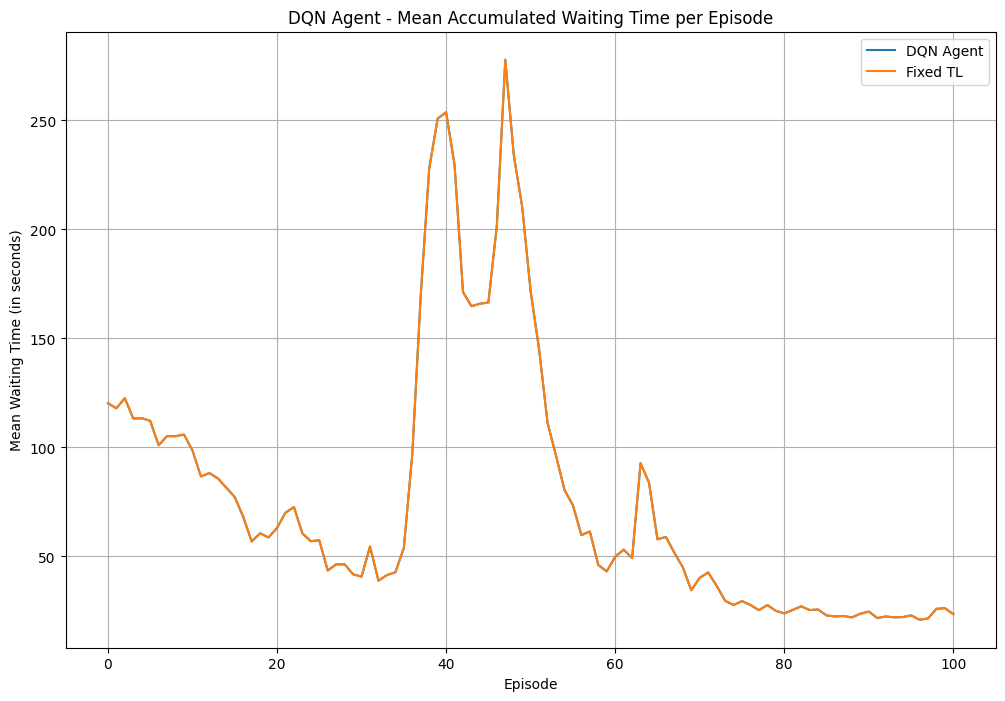

In [18]:
plt.figure(figsize=(12, 8))

plt.plot(df_dqn_agent_nf_1["episode"], df_dqn_agent_nf_1['mean_acc_waiting_time'], label="DQN Agent")

plt.plot(df_dqn_agent_nf_1["episode"], df_dqn_agent_nf_1['mean_acc_waiting_time'], label="Fixed TL")

plt.xlabel('Episode')
plt.ylabel('Mean Waiting Time (in seconds)')
plt.title('DQN Agent - Mean Accumulated Waiting Time per Episode')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
dqn_agent_nf_2 = DQNAgent(
    env=env_nf,
    learningRate=0.01,
    batchSize=64,
    explorationFraction=0.4,
    initialEpsilon = 0.8,
    verbose=1, 
    )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
dqn_agent_nf_2.learn(episodes=100)

In [24]:
df_dqn_agent_nf_2 = pd.DataFrame(dqn_agent_nf_2.callback.get_metrics())

In [25]:
df_dqn_agent_nf_2.to_csv("df_dqn_agent_nf_2_unb_fixed", index=False)

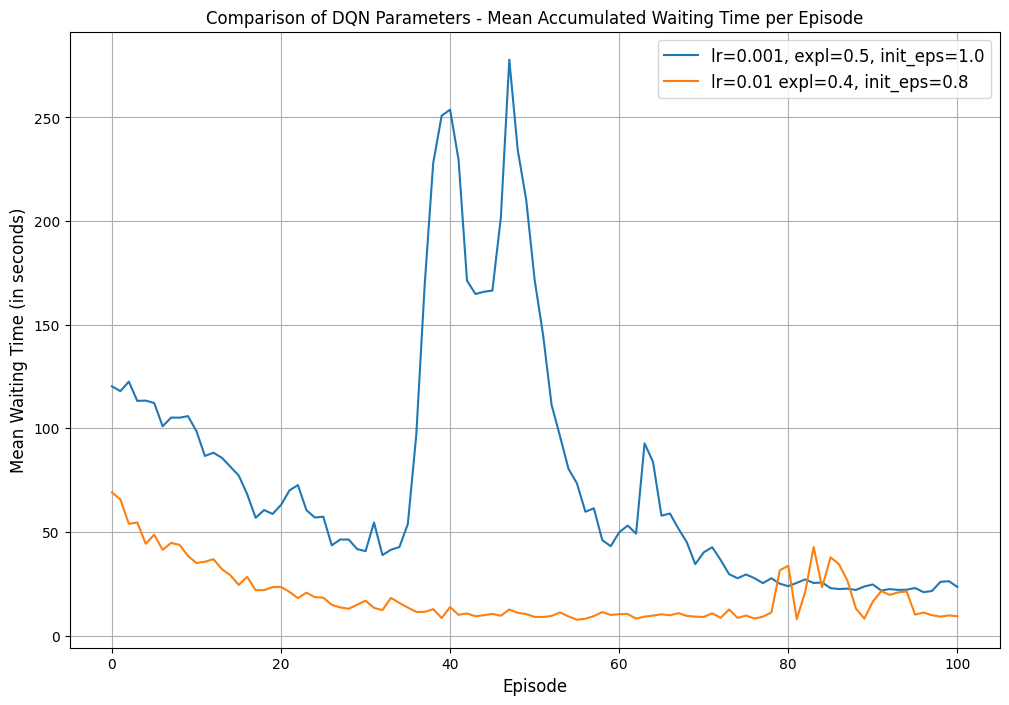

In [32]:
plt.figure(figsize=(12, 8))

plt.plot(df_dqn_agent_nf_1["episode"], df_dqn_agent_nf_1['mean_acc_waiting_time'], label="lr=0.001, expl=0.5, init_eps=1.0")

plt.plot(df_dqn_agent_nf_2["episode"], df_dqn_agent_nf_2['mean_acc_waiting_time'], label="lr=0.01 expl=0.4, init_eps=0.8")

plt.xlabel('Episode',fontsize=12)
plt.ylabel('Mean Waiting Time (in seconds)',fontsize=12)
plt.title('Comparison of DQN Parameters - Mean Accumulated Waiting Time per Episode')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

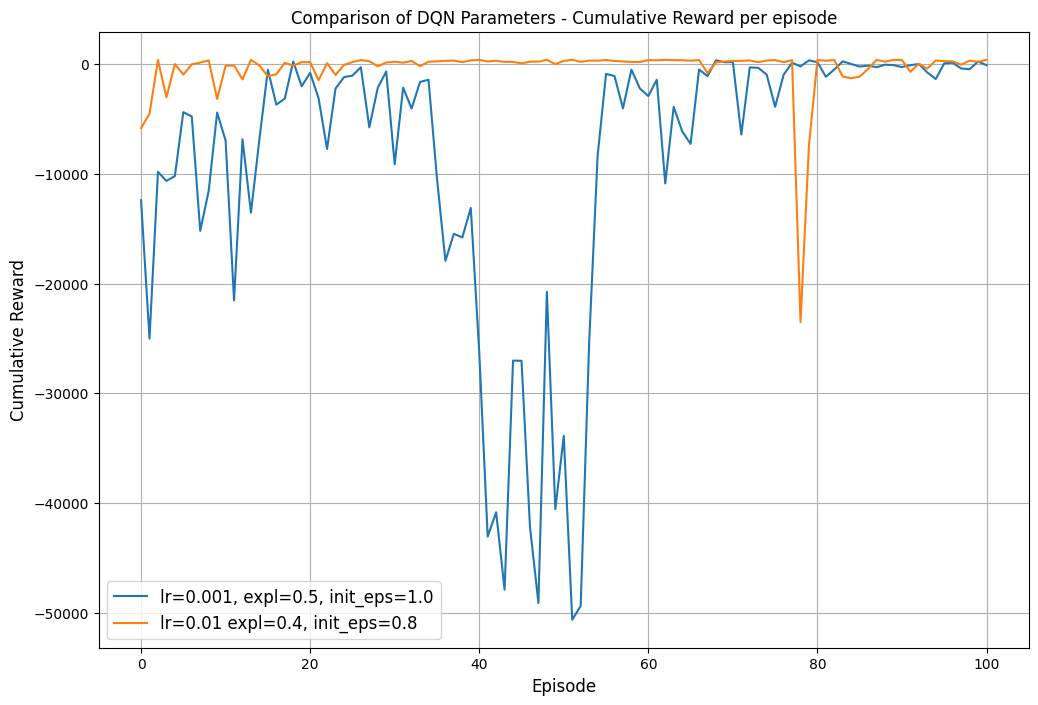

In [34]:
plt.figure(figsize=(12, 8))

plt.plot(df_dqn_agent_nf_1["episode"], df_dqn_agent_nf_1['cumulative_reward'], label="lr=0.001, expl=0.5, init_eps=1.0")

plt.plot(df_dqn_agent_nf_2["episode"], df_dqn_agent_nf_2['cumulative_reward'], label="lr=0.01 expl=0.4, init_eps=0.8")

plt.xlabel('Episode',fontsize=12)
plt.ylabel('Cumulative Reward',fontsize=12)
plt.title('Comparison of DQN Parameters - Cumulative Reward per episode')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [4]:
sumoCfgFile_unfair = os.path.abspath(os.path.join(current_dir, '../../../nets/2x2_intersection/intersection_WE.sumocfg'))
sumoCfgFile_unfair


'/home/juanma/Dev/tlc-rl/nets/2x2_intersection/intersection_WE.sumocfg'

In [6]:
diff_cwt_rw = DiffCWaitingTime()


In [8]:
env_nfA = SumoEnvironment(
    sumocfgFile=sumoCfgFile_unfair,
    deltaTime=5,
    yellowTime=4,
    minGreenTime=10,
    gui=False,
    edges=False,
    encodeIntervals={"waitingTime":20,"halted":20},
    maxEncodeValue={"waitingTime":2500,"halted":30},
    laneInfos=["waitingTime", "halted"],
    rewardFn=diff_cwt_rw,
    fixedTL=False,
    simTime=43800,
    sumoLog = False
)

dqn_agent_nf = DQNAgent(
    env=env_nfA,
    learningRate=0.01,
    batchSize=64,
    explorationFraction=0.4,
    initialEpsilon = 0.8,
    verbose=1, 
    )

dqn_agent_nf.learn(50)
df_dqn_agent_nf = pd.DataFrame(dqn_agent_nf.callback.get_metrics())
df_dqn_agent_nf.to_csv("dqn_agent_nf_unb_fixed_w0", index=False)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -1.82e+03 |
|    exploration_rate      | 0.761     |
| time/                    |           |
|    episode_time          | 42.4      |
|    episodes              | 1         |
|    fps                   | 203       |
|    time_elapsed          | 42        |
|    total_timesteps       | 8641      |
| train/                   |           |
|    95p_acc_waiting_time  | 191       |
|    learning_rate         | 0.01      |
|    loss                  | 216       |
|    mean_acc_waiting_time | 68        |
|    n_updates             | 8640      |
----------------------------------------
---------------------------------------
| rollout/                 |          |
|    ep_len_mean           | 8.64e+03 |
|    ep_rew_mean           | -2.5e+03 |
|    ex

In [15]:
env_fAw1 = SumoEnvironment(
    sumocfgFile=sumoCfgFile_unfair,
    deltaTime=5,
    yellowTime=4,
    minGreenTime=10,
    gui=False,
    edges=False,
    encodeIntervals={"waitingTime":20,"halted":20},
    maxEncodeValue={"waitingTime":2500,"halted":30},
    laneInfos=["waitingTime","halted"],
    rewardFn=MORewardFn(mainRewardFn=diff_cwt_rw, fairRewardFn=DiffNJainIndex(weight=1)),
)

dqn_agent_fw1 = DQNAgent(
    env=env_fAw1,
    learningRate=0.01,
    batchSize=64,
    explorationFraction=0.4,
    initialEpsilon = 0.8,
    verbose=1, 
    )

dqn_agent_fw1.learn(50)
df_dqn_agent_fw1 = pd.DataFrame(dqn_agent_fw1.callback.get_metrics())
df_dqn_agent_fw1.to_csv("dqn_agent_f_unb_fixed_w1", index=False)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -2.58e+03 |
|    exploration_rate      | 0.761     |
| time/                    |           |
|    episode_time          | 44        |
|    episodes              | 1         |
|    fps                   | 196       |
|    time_elapsed          | 43        |
|    total_timesteps       | 8641      |
| train/                   |           |
|    95p_acc_waiting_time  | 192       |
|    learning_rate         | 0.01      |
|    loss                  | 245       |
|    mean_acc_waiting_time | 66.3      |
|    n_updates             | 8640      |
----------------------------------------
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -3.11e+03 |
|  

In [16]:
env_fAw2 = SumoEnvironment(
    sumocfgFile=sumoCfgFile_unfair,
    deltaTime=5,
    yellowTime=4,
    minGreenTime=10,
    gui=False,
    edges=False,
    encodeIntervals={"waitingTime":20,"halted":20},
    maxEncodeValue={"waitingTime":2500,"halted":30},
    laneInfos=["waitingTime","halted"],
    rewardFn=MORewardFn(mainRewardFn=diff_cwt_rw, fairRewardFn=DiffNJainIndex(weight=2)),
)
dqn_agent_fw2 = DQNAgent(
    env=env_fAw2,
    learningRate=0.01,
    batchSize=64,
    explorationFraction=0.4,
    initialEpsilon = 0.8,
    verbose=1, 
    )

dqn_agent_fw2.learn(50)
df_dqn_agent_fw2 = pd.DataFrame(dqn_agent_fw2.callback.get_metrics())
df_dqn_agent_fw2.to_csv("dqn_agent_f_unb_fixed_w2", index=False)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -2.16e+03 |
|    exploration_rate      | 0.761     |
| time/                    |           |
|    episode_time          | 46.7      |
|    episodes              | 1         |
|    fps                   | 184       |
|    time_elapsed          | 46        |
|    total_timesteps       | 8641      |
| train/                   |           |
|    95p_acc_waiting_time  | 246       |
|    learning_rate         | 0.01      |
|    loss                  | 345       |
|    mean_acc_waiting_time | 88.4      |
|    n_updates             | 8640      |
----------------------------------------
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -1.25e+03 |
|  

In [17]:
env_fAw4 = SumoEnvironment(
    sumocfgFile=sumoCfgFile_unfair,
    deltaTime=5,
    yellowTime=4,
    minGreenTime=10,
    gui=False,
    edges=False,
    encodeIntervals={"waitingTime":20,"halted":20},
    maxEncodeValue={"waitingTime":2500,"halted":30},
    laneInfos=["waitingTime","halted"],
    rewardFn=MORewardFn(mainRewardFn=diff_cwt_rw, fairRewardFn=DiffNJainIndex(weight=4)),
)

dqn_agent_fw4 = DQNAgent(
    env=env_fAw4,
    learningRate=0.01,
    batchSize=64,
    explorationFraction=0.4,
    initialEpsilon = 0.8,
    verbose=1, 
    )

dqn_agent_fw4.learn(50)
df_dqn_agent_fw4 = pd.DataFrame(dqn_agent_fw4.callback.get_metrics())
df_dqn_agent_fw4.to_csv("dqn_agent_f_unb_fixed_w4", index=False)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -1.06e+04 |
|    exploration_rate      | 0.761     |
| time/                    |           |
|    episode_time          | 48.3      |
|    episodes              | 1         |
|    fps                   | 178       |
|    time_elapsed          | 48        |
|    total_timesteps       | 8641      |
| train/                   |           |
|    95p_acc_waiting_time  | 236       |
|    learning_rate         | 0.01      |
|    loss                  | 295       |
|    mean_acc_waiting_time | 78.3      |
|    n_updates             | 8640      |
----------------------------------------
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -7.26e+03 |
|  

In [18]:
env_fAw8 = SumoEnvironment(
    sumocfgFile=sumoCfgFile_unfair,
    deltaTime=5,
    yellowTime=4,
    minGreenTime=10,
    gui=False,
    edges=False,
    encodeIntervals={"waitingTime":20,"halted":20},
    maxEncodeValue={"waitingTime":2500,"halted":30},
    laneInfos=["waitingTime","halted"],
    rewardFn=MORewardFn(mainRewardFn=diff_cwt_rw, fairRewardFn=DiffNJainIndex(weight=8)),
)

dqn_agent_fw8 = DQNAgent(
    env=env_fAw8,
    learningRate=0.01,
    batchSize=64,
    explorationFraction=0.4,
    initialEpsilon = 0.8,
    verbose=1, 
    )

dqn_agent_fw8.learn(50)
df_dqn_agent_fw8 = pd.DataFrame(dqn_agent_fw8.callback.get_metrics())
df_dqn_agent_fw8.to_csv("dqn_agent_f_unb_fixed_w8", index=False)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------------
| rollout/                 |          |
|    ep_len_mean           | 8.64e+03 |
|    ep_rew_mean           | -798     |
|    exploration_rate      | 0.761    |
| time/                    |          |
|    episode_time          | 38.7     |
|    episodes              | 1        |
|    fps                   | 223      |
|    time_elapsed          | 38       |
|    total_timesteps       | 8641     |
| train/                   |          |
|    95p_acc_waiting_time  | 184      |
|    learning_rate         | 0.01     |
|    loss                  | 283      |
|    mean_acc_waiting_time | 64       |
|    n_updates             | 8640     |
---------------------------------------
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -1.14e+03 |
|    exploration_rate

In [19]:

env_fAw16 = SumoEnvironment(
    sumocfgFile=sumoCfgFile_unfair,
    deltaTime=5,
    yellowTime=4,
    minGreenTime=10,
    gui=False,
    edges=False,
    encodeIntervals={"waitingTime":20,"halted":20},
    maxEncodeValue={"waitingTime":2500,"halted":30},
    laneInfos=["waitingTime","halted"],
    rewardFn=MORewardFn(mainRewardFn=diff_cwt_rw, fairRewardFn=DiffNJainIndex(weight=16)),
)

dqn_agent_fw16 = DQNAgent(
    env=env_fAw16,
    learningRate=0.01,
    batchSize=64,
    explorationFraction=0.4,
    initialEpsilon = 0.8,
    verbose=1, 
    )

dqn_agent_fw16.learn(50)
df_dqn_agent_fw16 = pd.DataFrame(dqn_agent_fw16.callback.get_metrics())
df_dqn_agent_fw16.to_csv("dqn_agent_f_unb_fixed_w16", index=False)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -6.02e+03 |
|    exploration_rate      | 0.761     |
| time/                    |           |
|    episode_time          | 38.6      |
|    episodes              | 1         |
|    fps                   | 223       |
|    time_elapsed          | 38        |
|    total_timesteps       | 8641      |
| train/                   |           |
|    95p_acc_waiting_time  | 194       |
|    learning_rate         | 0.01      |
|    loss                  | 308       |
|    mean_acc_waiting_time | 68        |
|    n_updates             | 8640      |
----------------------------------------
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -4.75e+03 |
|  

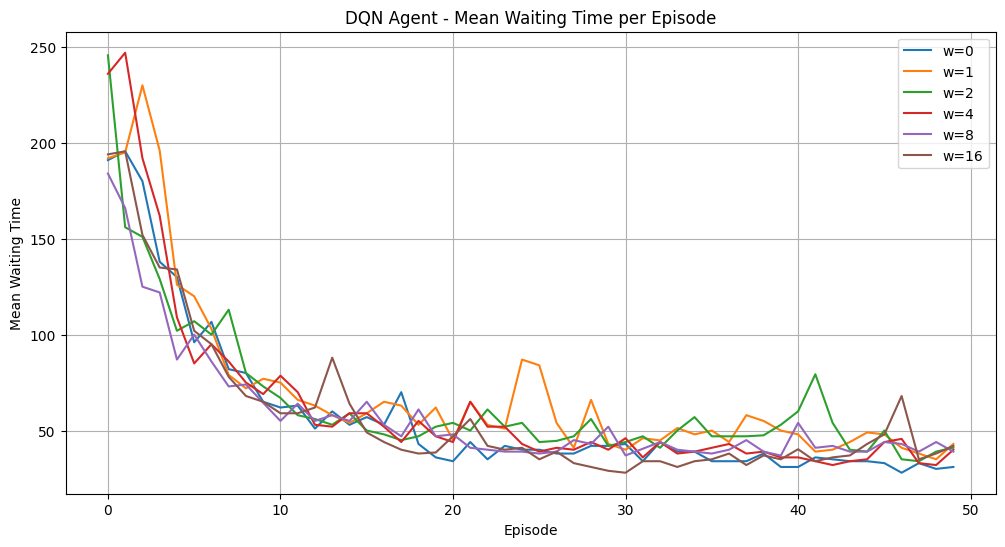

In [22]:

env_fAw25 = SumoEnvironment(
    sumocfgFile=sumoCfgFile_unfair,
    deltaTime=5,
    yellowTime=4,
    minGreenTime=10,
    gui=False,
    edges=False,
    encodeIntervals={"waitingTime":20,"halted":20},
    maxEncodeValue={"waitingTime":2500,"halted":30},
    laneInfos=["waitingTime","halted"],
    rewardFn=MORewardFn(mainRewardFn=diff_cwt_rw, fairRewardFn=DiffNJainIndex(weight=25)),
)

dqn_agent_fw25 = DQNAgent(
    env=env_fAw25,
    learningRate=0.01,
    batchSize=64,
    explorationFraction=0.4,
    initialEpsilon = 0.8,
    verbose=1, 
    )

dqn_agent_fw25.learn(50)
df_dqn_agent_fw25 = pd.DataFrame(dqn_agent_fw25.callback.get_metrics())
df_dqn_agent_fw25.to_csv("dqn_agent_f_unb_fixed_w25", index=False)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -2.04e+03 |
|    exploration_rate      | 0.761     |
| time/                    |           |
|    episode_time          | 40.2      |
|    episodes              | 1         |
|    fps                   | 214       |
|    time_elapsed          | 40        |
|    total_timesteps       | 8641      |
| train/                   |           |
|    95p_acc_waiting_time  | 173       |
|    learning_rate         | 0.01      |
|    loss                  | 151       |
|    mean_acc_waiting_time | 60.8      |
|    n_updates             | 8640      |
----------------------------------------
----------------------------------------
| rollout/                 |           |
|    ep_len_mean           | 8.64e+03  |
|    ep_rew_mean           | -4.82e+03 |
|  

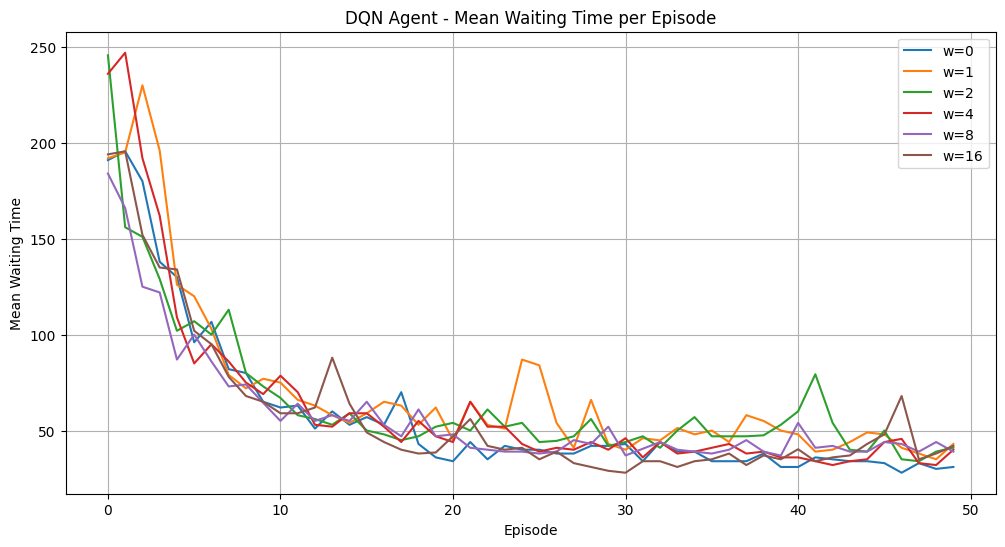

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df_dqn_agent_nf["episode"], df_dqn_agent_nf['waiting_time_95p'],label="w=0")
plt.plot(df_dqn_agent_fw1["episode"], df_dqn_agent_fw1['waiting_time_95p'],label="w=1")
plt.plot(df_dqn_agent_fw2["episode"], df_dqn_agent_fw2['waiting_time_95p'],label="w=2")
plt.plot(df_dqn_agent_fw4["episode"], df_dqn_agent_fw4['waiting_time_95p'],label="w=4")
plt.plot(df_dqn_agent_fw8["episode"], df_dqn_agent_fw8['waiting_time_95p'],label="w=8")
plt.plot(df_dqn_agent_fw16["episode"], df_dqn_agent_fw16['waiting_time_95p'],label="w=16")
#plt.plot(df_dqn_agent_fw25["episode"], df_dqn_agent_fw25['waiting_time_95p'],label="w=16")


plt.xlabel('Episode',fontsize=12)
plt.ylabel('Mean Waiting Time')
plt.title('DQN Agent - 95th percentile of Waiting Times per episode')
plt.legend()

plt.grid(True)
plt.show()